# Section 4

## Phonon dispersion bands of FeS$_2$

/home/anmoureaux/.local/lib/python3.8/site-packages/pymatgen/phonon/bandstructure.py:424: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.nac_frequencies = np.array(naf)
/home/anmoureaux/.local/lib/python3.8/site-packages/pymatgen/phonon/bandstructure.py:425: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.nac_eigendisplacements = np.array(nac_eigendisplacements)


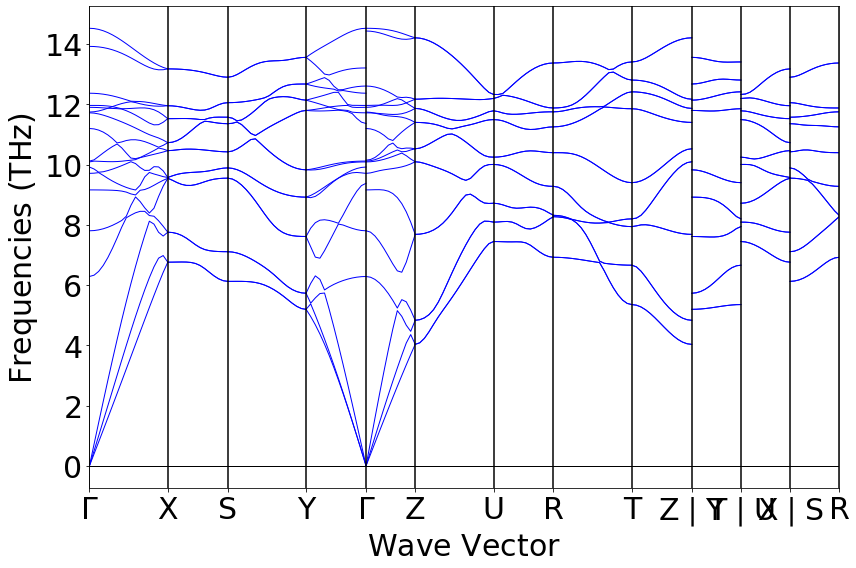

In [3]:
import pymatgen.phonon.plotter as Phononplotter
from pymatgen.ext.matproj import *
import pymatgen.phonon.dos as dos
import numpy as np
import matplotlib.pyplot as plt

#création de la bandestructure phononique du FeS2
with MPRester("H45GsyS7rpfkZzFI") as m:
    bs = m.get_phonon_bandstructure_by_material_id("mp-1522")
    #affichage de la structure de bande
    plotter = Phononplotter.PhononBSPlotter(bs)
    plotter.get_plot()
    plotter.save_plot("phononbandStructure.pdf")

## Directional spectral absorptivity

100%|██████████| 100/100 [00:01<00:00, 96.77it/s]


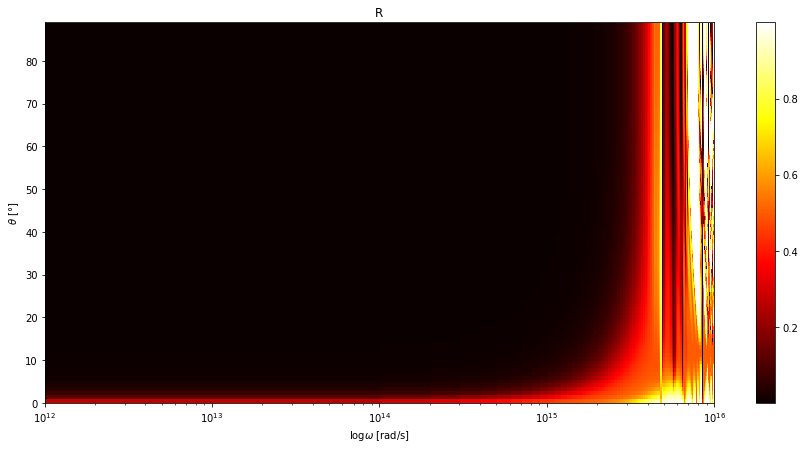

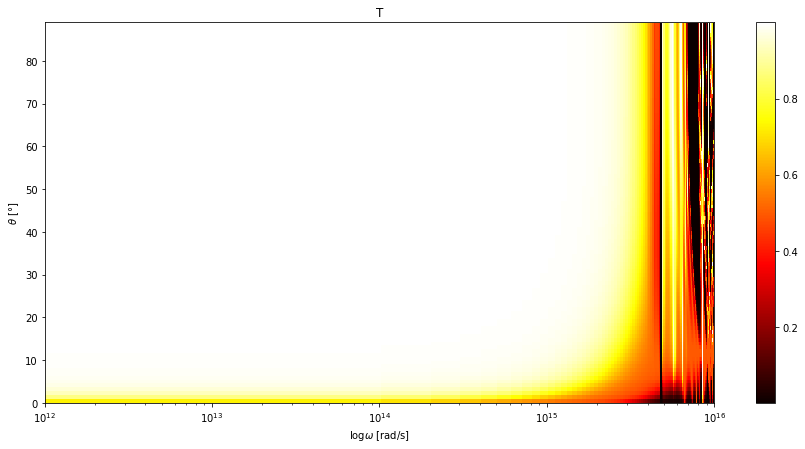

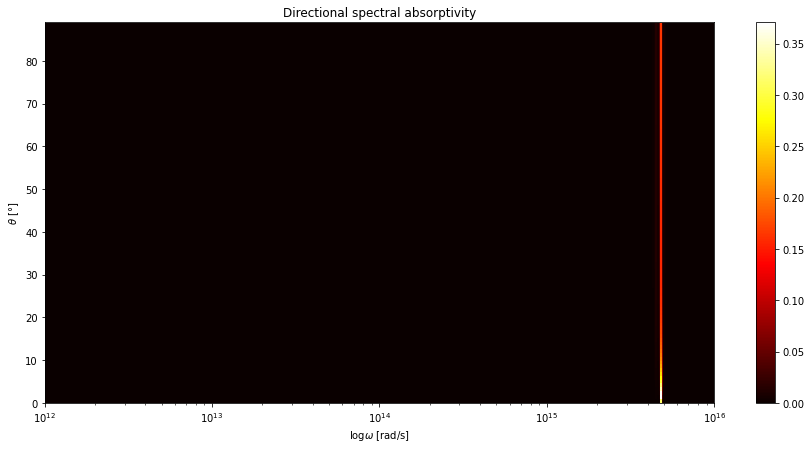

In [49]:
from multislabs import computeRT, computeN
from tqdm import tqdm

#data (nm) to maximize reflectivity
d1 = 86
d2 = 523
N = 5

# determine the relevant range of angular frequencies 
omega_g = 1.338e15 #[rad/s]
nsamples = 100
omega = np.logspace(12,16,nsamples)#np.logspace(np.log10(np.sqrt(0.8/1.2)*0.9*omega_g),np.log10(0.9*omega_g),nsamples)
theta = np.linspace(0,89,nsamples)
alpha_lambda = np.zeros((nsamples,nsamples))
R = np.zeros((nsamples,nsamples))
T = np.zeros((nsamples,nsamples))
n = computeN(omega)
#determine R_lambda and T_lambda
for i in tqdm(range(nsamples)) :
    R[i],T[i] = computeRT(d1/1000,d2/1000,N,n,np.deg2rad(theta[i]),omega)
    alpha_lambda[i] = 1-(R[i]+T[i])
    
plt.figure(figsize=(15,7))
plt.imshow(R,cmap='hot',extent=[omega[0],omega[-1],theta[0],theta[-1]],aspect='auto')
plt.colorbar()
plt.xscale('log')
plt.xlabel(r"$\log \omega$ [rad/s]")
plt.ylabel(r"$\theta$ [°]")
plt.title("R")
plt.savefig("test_R.pdf")

plt.figure(figsize=(15,7))
plt.imshow(T,cmap='hot',extent=[omega[0],omega[-1],theta[0],theta[-1]],aspect='auto')
plt.colorbar()
plt.xscale('log')
plt.xlabel(r"$\log \omega$ [rad/s]")
plt.ylabel(r"$\theta$ [°]")
plt.title("T")
plt.savefig("test_T.pdf")

plt.figure(figsize=(15,7))
plt.imshow(alpha_lambda,cmap='hot',extent=[omega[0],omega[-1],theta[0],theta[-1]],aspect='auto')
plt.colorbar()
plt.xscale('log')
plt.xlabel(r"$\log \omega$ [rad/s]")
plt.ylabel(r"$\theta$ [°]")
plt.title("Directional spectral absorptivity")
plt.savefig("test_dir_abs.pdf")
plt.show()

## Hemispherical spectral emissivity

100%|██████████| 100/100 [00:00<00:00, 15398.72it/s]


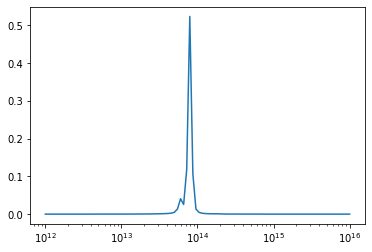

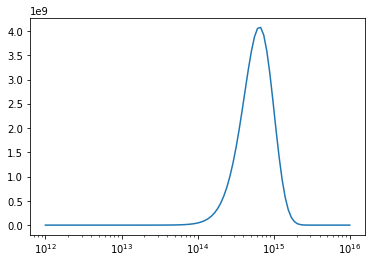

In [59]:
epsilon_lambda = np.zeros(nsamples)
bbemission = np.zeros(nsamples)
c = 3e8
h = 6.62607004e-34
k = 1.38064852e-23
T = 1000
for i in tqdm(range(nsamples)) : 
    epsilon_lambda[i] = 2*np.pi*np.trapz(np.cos(np.deg2rad(theta))*np.sin(np.deg2rad(theta))*alpha_lambda[:,i],np.deg2rad(theta))
    lam = c*2*np.pi/omega[i]
    bbemission[i] = 2*h*c**2*np.cos(0)/(lam**5*(np.exp(h*c/(k*T*lam))-1))

plt.plot(omega,epsilon_lambda)
plt.xscale('log')
plt.figure()
plt.plot(omega,bbemission)
plt.xscale('log')
plt.show()